In [95]:
import numpy as np
from spacepy import pycdf
from matplotlib import pyplot as plt

# Load and explore data for space crafts

with pycdf.CDF("../data/C1_CP_FGM_SPIN__20010705_000001_20010705_235959_V141122.cdf") as cdf:
    print(cdf.keys(), "\n")
    print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")
    print(cdf["sc_pos_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C1 = cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"][:] # nT
    time_tags_C1 = cdf["time_tags__C1_CP_FGM_SPIN"][:]
    pos_C1 = cdf["sc_pos_xyz_gse__C1_CP_FGM_SPIN"][:] # km

with pycdf.CDF("../data/C2_CP_FGM_SPIN__20010705_000001_20010705_235959_V140305.cdf") as cdf:
    #print(cdf.keys(), "\n")
    #print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C2 = cdf["B_vec_xyz_gse__C2_CP_FGM_SPIN"][:] # nT
    time_tags_C2 = cdf["time_tags__C2_CP_FGM_SPIN"][:]
    pos_C2 = cdf["sc_pos_xyz_gse__C2_CP_FGM_SPIN"][:] # km

with pycdf.CDF("../data/C3_CP_FGM_SPIN__20010705_000001_20010705_235959_V140305.cdf") as cdf:
    #print(cdf.keys(), "\n")
    #print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C3 = cdf["B_vec_xyz_gse__C3_CP_FGM_SPIN"][:] # nT
    time_tags_C3 = cdf["time_tags__C3_CP_FGM_SPIN"][:]
    pos_C3 = cdf["sc_pos_xyz_gse__C3_CP_FGM_SPIN"][:] # km    

with pycdf.CDF("../data/C4_CP_FGM_SPIN__20010705_000001_20010705_235959_V140305.cdf") as cdf:
    #print(cdf.keys(), "\n")
    #print(cdf["B_vec_xyz_gse__C1_CP_FGM_SPIN"].attrs, "\n")

    B_C4 = cdf["B_vec_xyz_gse__C4_CP_FGM_SPIN"][:] # nT
    time_tags_C4 = cdf["time_tags__C4_CP_FGM_SPIN"][:]  
    pos_C4 = cdf["sc_pos_xyz_gse__C4_CP_FGM_SPIN"][:] # km  

KeysView(<CDF:
B_mag__C1_CP_FGM_SPIN: CDF_FLOAT [18617]
B_vec_xyz_gse__C1_CP_FGM_SPIN: CDF_FLOAT [18617, 3]
B_vec_xyz_gse__C1_CP_FGM_SPIN_LABEL_1: CDF_CHAR*2 [3] NRV
B_vec_xyz_gse__C1_CP_FGM_SPIN_REPRESENTATION_1: CDF_CHAR*1 [3] NRV
half_interval__C1_CP_FGM_SPIN: CDF_FLOAT [18617]
range__C1_CP_FGM_SPIN: CDF_INT4 [18617]
sc_pos_xyz_gse__C1_CP_FGM_SPIN: CDF_FLOAT [18617, 3]
sc_pos_xyz_gse__C1_CP_FGM_SPIN_LABEL_1: CDF_CHAR*1 [3] NRV
sc_pos_xyz_gse__C1_CP_FGM_SPIN_REPRESENTATION_1: CDF_CHAR*1 [3] NRV
time_tags__C1_CP_FGM_SPIN: CDF_EPOCH [18617]
tm__C1_CP_FGM_SPIN: CDF_INT4 [18617]
>) 

CATDESC: Magnetic Field Vector, spin resolution in GSE [CDF_CHAR]
COORDINATE_SYSTEM: GSE>Geocentric Solar Ecliptic [CDF_CHAR]
DEPEND_0: time_tags__C1_CP_FGM_SPIN [CDF_CHAR]
ENTITY: Magnetic_Field [CDF_CHAR]
FIELDNAM: Magnetic Field Vector, spin resolution in GSE [CDF_CHAR]
FILLVAL: -1e+30 [CDF_FLOAT]
FLUCTUATIONS: Waveform [CDF_CHAR]
LABEL_1: B_vec_xyz_gse__C1_CP_FGM_SPIN_LABEL_1 [CDF_CHAR]
LABLAXIS: Mag Fie

In [96]:
import datetime
startTime = datetime.datetime(2001,7,5,6,10,0)
endTime = datetime.datetime(2001,7,5,6,40,0)

# Convert to numpy array
t_C1 = np.array(time_tags_C1)
t_C2 = np.array(time_tags_C2)
t_C3 = np.array(time_tags_C3)
t_C4 = np.array(time_tags_C4)


# Calculate differences from target time
diffsEnd_C1 = np.abs(t_C1-endTime)
diffsStart_C1 = np.abs(t_C1-startTime)
diffsEnd_C2 = np.abs(t_C2-endTime)
diffsStart_C2 = np.abs(t_C2-startTime)
diffsEnd_C3 = np.abs(t_C3-endTime)
diffsStart_C3 = np.abs(t_C3-startTime)
diffsEnd_C4 = np.abs(t_C4-endTime)
diffsStart_C4 = np.abs(t_C4-startTime)
# Find index of target time
endTimeIdx_C1 = np.argmin(diffsEnd_C1)
startTimeIdx_C1 = np.argmin(diffsStart_C1)
endTimeIdx_C2 = np.argmin(diffsEnd_C2)
startTimeIdx_C2 = np.argmin(diffsStart_C2)
endTimeIdx_C3 = np.argmin(diffsEnd_C3)
startTimeIdx_C3 = np.argmin(diffsStart_C3)
endTimeIdx_C4 = np.argmin(diffsEnd_C4)
startTimeIdx_C4 = np.argmin(diffsStart_C4)

B_C1_zoom = B_C1[startTimeIdx_C1:endTimeIdx_C1]
B_C2_zoom = B_C2[startTimeIdx_C2:endTimeIdx_C2]
B_C3_zoom = B_C3[startTimeIdx_C3:endTimeIdx_C3]
B_C4_zoom = B_C4[startTimeIdx_C4:endTimeIdx_C4]
time_tags_C1_zoom = time_tags_C1[startTimeIdx_C1:endTimeIdx_C1]
time_tags_C2_zoom = time_tags_C2[startTimeIdx_C2:endTimeIdx_C2]
time_tags_C3_zoom = time_tags_C3[startTimeIdx_C3:endTimeIdx_C3]
time_tags_C4_zoom = time_tags_C4[startTimeIdx_C4:endTimeIdx_C4]
pos_C1_zoom = pos_C1[startTimeIdx_C1:endTimeIdx_C1]
pos_C2_zoom = pos_C2[startTimeIdx_C2:endTimeIdx_C2]
pos_C3_zoom = pos_C3[startTimeIdx_C3:endTimeIdx_C3]
pos_C4_zoom = pos_C4[startTimeIdx_C4:endTimeIdx_C4]

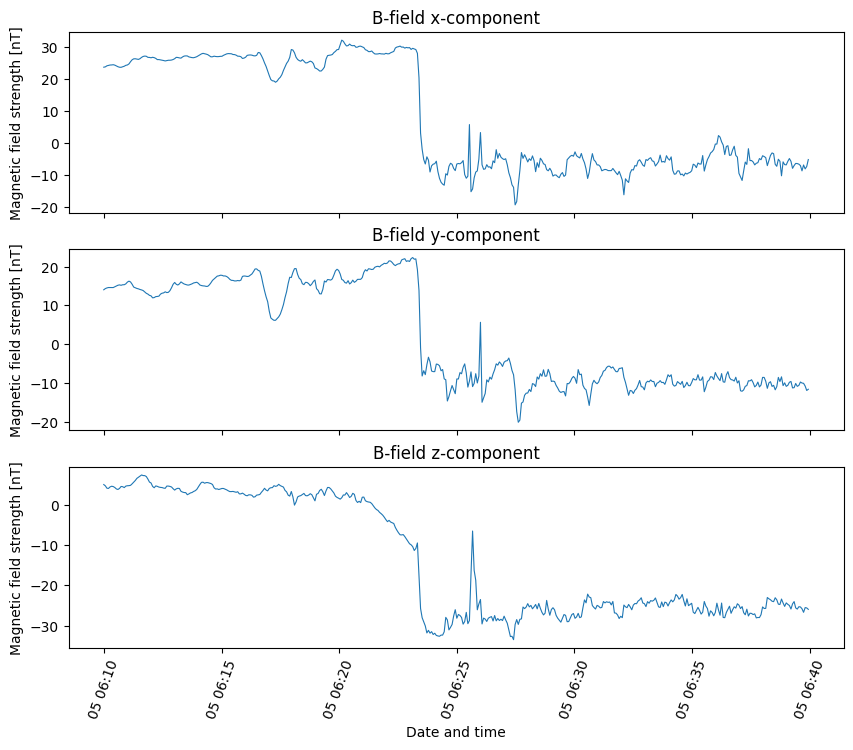

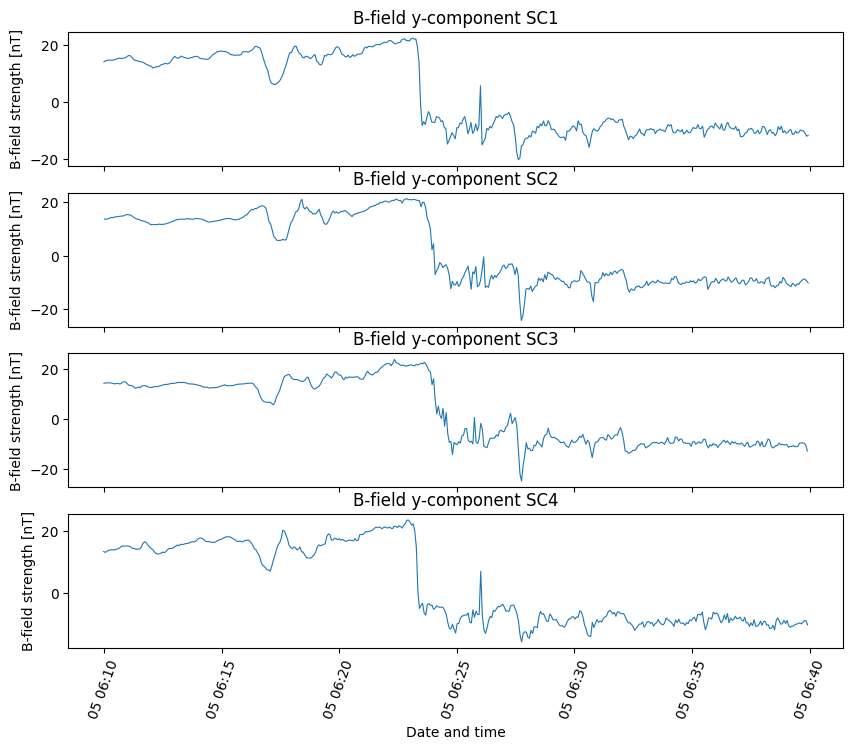

In [97]:
## Visualize ##

# B-field components for space craft 1 06:10 -> 06:40

fig, axs = plt.subplots(3,1, sharex=True, figsize=(10,8))

axs[0].plot(time_tags_C1_zoom,B_C1_zoom[:,0], lw=0.8)
axs[0].set_ylabel("Magnetic field strength [nT]")
axs[0].set_title("B-field x-component")

axs[1].plot(time_tags_C1_zoom,B_C1_zoom[:,1], lw=0.8)
axs[1].set_ylabel("Magnetic field strength [nT]")
axs[1].set_title("B-field y-component")

axs[2].plot(time_tags_C1_zoom,B_C1_zoom[:,2], lw=0.8)
axs[2].set_ylabel("Magnetic field strength [nT]")
axs[2].set_title("B-field z-component")
axs[2].set_xlabel("Date and time")
axs[2].tick_params(axis='x', rotation=70)


# B-field component from all space craft 16:10 -> 16:40 

component = "y"

if component=="x":
    comp=0
elif component=="y":
    comp=1
elif component=="z":
    comp=2



fig, axs = plt.subplots(4,1, sharex=True, figsize=(10,8))

axs[0].plot(time_tags_C1_zoom,B_C1_zoom[:,comp], lw=0.8)
axs[0].set_ylabel("B-field strength [nT]")
axs[0].set_title(f"B-field {component}-component SC1")

axs[1].plot(time_tags_C2_zoom,B_C2_zoom[:,comp], lw=0.8)
axs[1].set_ylabel("B-field strength [nT]")
axs[1].set_title(f"B-field {component}-component SC2")

axs[2].plot(time_tags_C3_zoom,B_C3_zoom[:,comp], lw=0.8)
axs[2].set_ylabel("B-field strength [nT]")
axs[2].set_title(f"B-field {component}-component SC3")

axs[3].plot(time_tags_C4_zoom,B_C4_zoom[:,comp], lw=0.8)
axs[3].set_ylabel("B-field strength [nT]")
axs[3].set_title(f"B-field {component}-component SC4")
axs[3].set_xlabel("Date and time")
axs[3].tick_params(axis='x', rotation=70)

In [98]:
## Orientation of current sheet. ##

def findIdx(targetTime,time_tags):
    t = np.array(time_tags)
    diffs = np.abs(t-targetTime)
    return np.argmin(diffs)

averagingLength = 10
beforeTime = datetime.datetime(2001,7,5,6,22,30)
afterTime = datetime.datetime(2001,7,5,6,24,30)

def get_sheet_normal(beforeTime,afterTime,time_tags,B):
    # Convert to numpy array
    t = np.array(time_tags)
    averagingLength = 10
    beforeIdx = findIdx(beforeTime,t)
    afterIdx = findIdx(afterTime,t)

    avg_before = np.sum(B[beforeIdx-averagingLength:beforeIdx],axis=0)/averagingLength
    avg_after = np.sum(B[afterIdx:afterIdx+averagingLength],axis=0)/averagingLength

    sheet_normal = np.cross(avg_before,avg_after)
    sheet_normal = sheet_normal/np.linalg.norm(sheet_normal)
    print(sheet_normal)
    return sheet_normal

n1 = get_sheet_normal(beforeTime,afterTime,time_tags_C1_zoom,B_C1_zoom)
n2 = get_sheet_normal(beforeTime,afterTime,time_tags_C2_zoom,B_C2_zoom)
n3 = get_sheet_normal(beforeTime,afterTime,time_tags_C3_zoom,B_C3_zoom)
n4 = get_sheet_normal(beforeTime,afterTime,time_tags_C4_zoom,B_C4_zoom)

avg_n = (n1+n2+n3+n4)
avg_n = avg_n/np.linalg.norm(avg_n)
print(avg_n)




[-0.59760135  0.7883721  -0.14608876]
[-0.57484096  0.8071107  -0.13464831]
[-0.6370957   0.76069283 -0.12431964]
[-0.6273706   0.7769224  -0.05289475]
[-0.6099032   0.78414375 -0.11461491]


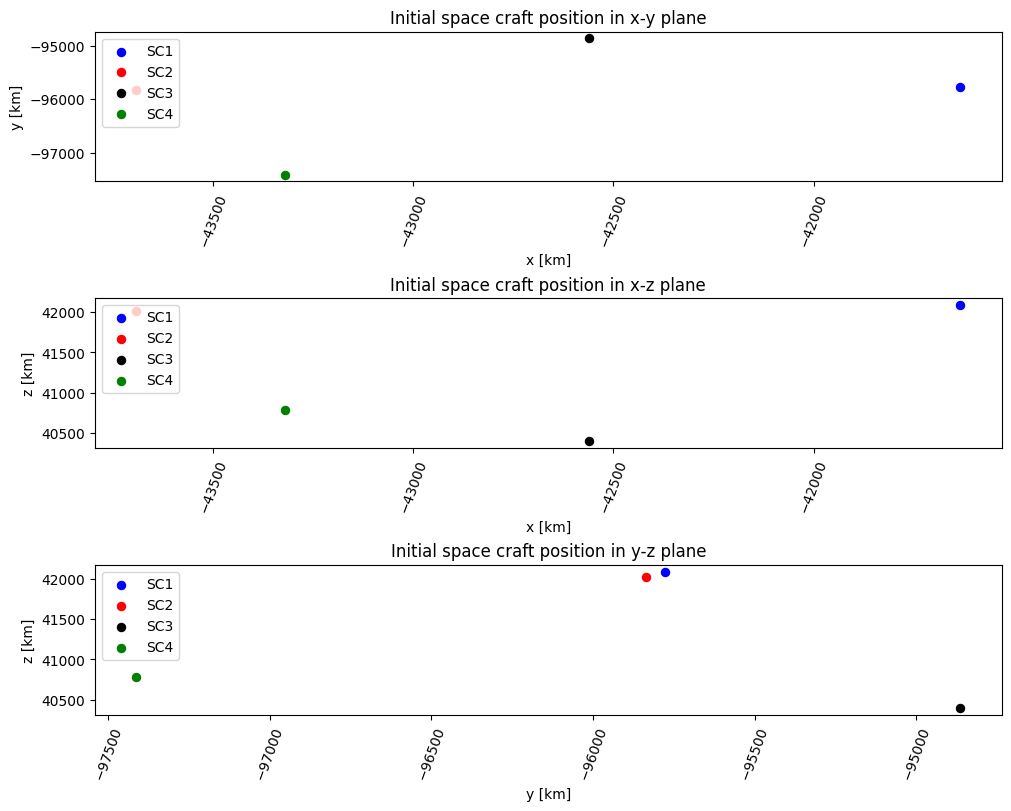

In [99]:
## b) ##
# Rough estimation of time of passing the current sheet
etof1 = findIdx(datetime.datetime(2001,7,5,6,10,0),time_tags_C1_zoom)
etof2 = findIdx(datetime.datetime(2001,7,5,6,10,0),time_tags_C2_zoom)
etof3 = findIdx(datetime.datetime(2001,7,5,6,10,0),time_tags_C3_zoom)
etof4 = findIdx(datetime.datetime(2001,7,5,6,10,0),time_tags_C4_zoom)
fig, axs = plt.subplots(3,1, sharex=False, figsize=(10,8), constrained_layout=True)

axs[0].scatter(pos_C1_zoom[etof1,0],pos_C1_zoom[etof1,1], lw=0.8, color="blue", label="SC1")
axs[0].scatter(pos_C2_zoom[etof2,0],pos_C2_zoom[etof2,1], lw=0.8, color="red", label="SC2")
axs[0].scatter(pos_C3_zoom[etof3,0],pos_C3_zoom[etof3,1], lw=0.8, color="black", label="SC3")
axs[0].scatter(pos_C4_zoom[etof4,0],pos_C4_zoom[etof4,1], lw=0.8, color="green", label="SC4")
#axs[0].scatter(0,0)
axs[0].set_ylabel("y [km]")
axs[0].set_title("Initial space craft position in x-y plane")
axs[0].set_xlabel("x [km]")
axs[0].legend(loc="upper left")
axs[0].tick_params(axis='x', rotation=70)


axs[1].scatter(pos_C1_zoom[etof1,0],pos_C1_zoom[etof1,2], lw=0.8, color="blue", label="SC1")
axs[1].scatter(pos_C2_zoom[etof2,0],pos_C2_zoom[etof2,2], lw=0.8, color="red", label="SC2")
axs[1].scatter(pos_C3_zoom[etof3,0],pos_C3_zoom[etof3,2], lw=0.8, color="black", label="SC3")
axs[1].scatter(pos_C4_zoom[etof4,0],pos_C4_zoom[etof4,2], lw=0.8, color="green", label="SC4")
#axs[0].scatter(0,0)
axs[1].set_ylabel("z [km]")
axs[1].set_title("Initial space craft position in x-z plane")
axs[1].set_xlabel("x [km]")
axs[1].legend(loc="upper left")
axs[1].tick_params(axis='x', rotation=70)


axs[2].scatter(pos_C1_zoom[etof1,1],pos_C1_zoom[etof1,2], lw=0.8, color="blue", label="SC1")
axs[2].scatter(pos_C2_zoom[etof2,1],pos_C2_zoom[etof2,2], lw=0.8, color="red", label="SC2")
axs[2].scatter(pos_C3_zoom[etof3,1],pos_C3_zoom[etof3,2], lw=0.8, color="black", label="SC3")
axs[2].scatter(pos_C4_zoom[etof4,1],pos_C4_zoom[etof4,2], lw=0.8, color="green", label="SC4")
#axs[0].scatter(0,0)
axs[2].set_ylabel("z [km]")
axs[2].set_title("Initial space craft position in y-z plane")
axs[2].set_xlabel("y [km]")
axs[2].legend(loc="upper left")
axs[2].tick_params(axis='x', rotation=70)


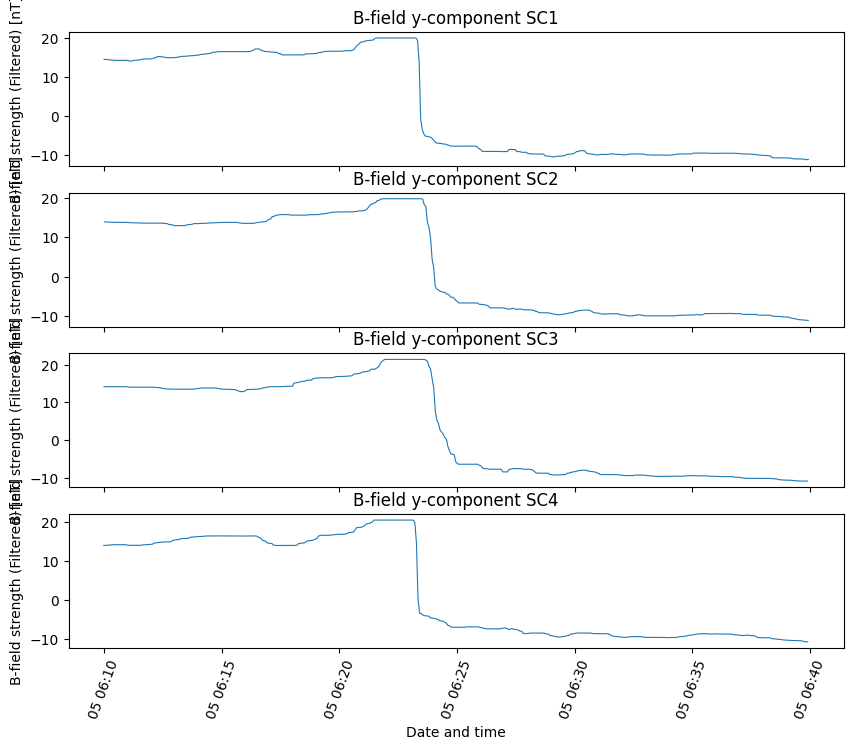

In [100]:
from scipy.signal import medfilt

### Determine thickness of current sheet ###

# Apply median filter for smoothing and visualize
kernel_size = 51
By_C1_filt = medfilt(B_C1[:,comp],kernel_size=kernel_size)
By_C2_filt = medfilt(B_C2[:,comp],kernel_size=kernel_size)
By_C3_filt = medfilt(B_C3[:,comp],kernel_size=kernel_size)
By_C4_filt = medfilt(B_C4[:,comp],kernel_size=kernel_size)


# Visualize filtered B

fig, axs = plt.subplots(4,1, sharex=True, figsize=(10,8))

axs[0].plot(time_tags_C1[startTimeIdx_C1:endTimeIdx_C1],By_C1_filt[startTimeIdx_C1:endTimeIdx_C1], lw=0.8)
axs[0].set_ylabel("B-field strength (Filtered) [nT]")
axs[0].set_title(f"B-field {component}-component SC1")

axs[1].plot(time_tags_C2[startTimeIdx_C2:endTimeIdx_C2],By_C2_filt[startTimeIdx_C2:endTimeIdx_C2], lw=0.8)
axs[1].set_ylabel("B-field strength (Filtered) [nT]")
axs[1].set_title(f"B-field {component}-component SC2")

axs[2].plot(time_tags_C3[startTimeIdx_C3:endTimeIdx_C3],By_C3_filt[startTimeIdx_C3:endTimeIdx_C3], lw=0.8)
axs[2].set_ylabel("B-field strength (Filtered) [nT]")
axs[2].set_title(f"B-field {component}-component SC3")

axs[3].plot(time_tags_C4[startTimeIdx_C4:endTimeIdx_C4],By_C4_filt[startTimeIdx_C4:endTimeIdx_C4], lw=0.8)
axs[3].set_ylabel("B-field strength (Filtered) [nT]")
axs[3].set_title(f"B-field {component}-component SC4")
axs[3].set_xlabel("Date and time")
axs[3].tick_params(axis='x', rotation=70)


def findPassingTimesIdx(B,threshold_high,threshold_low):
    B_bool = (B > threshold_high)
    idx_high = np.flatnonzero(B_bool)
    startIdx = idx_high[-1] if idx_high.size > 0 else None

    B_bool = (B < threshold_low)
    idx_low = np.flatnonzero(B_bool)
    endIdx = idx_low[0] if idx_low.size > 0 else None
    return [startIdx, endIdx]

In [102]:
def findPassingTimesIdx(B,threshold_high,threshold_low):
    B_bool = (B > threshold_high)
    idx_high = np.flatnonzero(B_bool)
    startIdx = idx_high[-1] if idx_high.size > 0 else None

    #plt.figure()
    #plt.plot(range(len(B_bool)),B_bool)
    #plt.show()

    B_bool = (B < threshold_low)
    idx_low = np.flatnonzero(B_bool)
    endIdx = idx_low[0] if idx_low.size > 0 else None

    #plt.figure()
    #plt.plot(range(len(B_bool)),B_bool)
    #plt.show()

    return [startIdx, endIdx]

# Choose thresholds from looking at plots.
th1, tl1 = 15, -5
th2, tl2 = 15, -5
th3, tl3 = 15, -5
th4, tl4 = 15, -5

[startIdx_C1,endIdx_C1] = findPassingTimesIdx(By_C1_filt[startTimeIdx_C1:endTimeIdx_C1],th1,tl1)
[startIdx_C2,endIdx_C2] = findPassingTimesIdx(By_C2_filt[startTimeIdx_C2:endTimeIdx_C2],th2,tl2)
[startIdx_C3,endIdx_C3] = findPassingTimesIdx(By_C3_filt[startTimeIdx_C3:endTimeIdx_C3],th3,tl3)
[startIdx_C4,endIdx_C4] = findPassingTimesIdx(By_C4_filt[startTimeIdx_C4:endTimeIdx_C4],th4,tl4)

print(time_tags_C1_zoom[endIdx_C1]-time_tags_C1_zoom[startIdx_C1])

# Time tags of when each space craft is in the middle of the current sheet
avgPast_C1 = time_tags_C1_zoom[round((startIdx_C1+endIdx_C1)/2)]
avgPast_C2 = time_tags_C2_zoom[round((startIdx_C2+endIdx_C2)/2)]
avgPast_C3 = time_tags_C3_zoom[round((startIdx_C3+endIdx_C3)/2)]
avgPast_C4 = time_tags_C4_zoom[round((startIdx_C4+endIdx_C4)/2)]

print(avgPast_C1,"\n", avgPast_C2,"\n", avgPast_C3,"\n", avgPast_C4,"\n")

# Calculate distance in normal direction between the space crafts



0:00:20.101000
2001-07-05 06:23:31.513000 
 2001-07-05 06:24:12.543000 
 2001-07-05 06:24:24.769000 
 2001-07-05 06:23:44.645000 

